In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(left=study_results, right = mouse_metadata, on= "Mouse ID", how = 'outer')

# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [133]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [134]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupmouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
dupmouse_id

array(['g989'], dtype=object)

In [135]:
#OPTIONAL: Get all the data for the duplicate mouse ID.
dupmouse_id_data = mouse_study_df.loc[mouse_study_df['Mouse ID']== 'g989']
dupmouse_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID 
mouse_clean_df = mouse_study_df.loc[~mouse_study_df["Mouse ID"].isin(dupmouse_id)]
mouse_clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [137]:
#Number of mice in new DataFrame
mice_number = mouse_clean_df.nunique()["Mouse ID"]
mice_number

248

### SUMMARY STATISTICS


In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Sort clean data by tumor
mouse_clean_sort = mouse_clean_df.sort_values(['Tumor Volume (mm3)'], ascending = True)

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation and SEM of the tumor volume
mean = mouse_clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = mouse_clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = mouse_clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = mouse_clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = mouse_clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

drugtx_regimen_df = pd.DataFrame({"Mean Tumor Volume (mm3)": means,
                            "Median Tumor Volume (mm3)": median,
                            "Variance Tumor Volume (mm3)": variance,
                            "Standard Deviation Tumor Volume (mm3)": std,
                            "Stardard Error Tumor Volume (mm3)": SEM})
drugtx_regimen_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Stardard Error Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_regimen_agg = mouse_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts


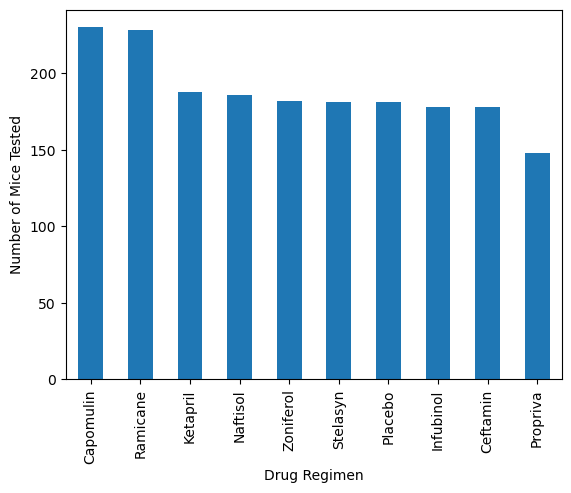

In [140]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas
pandas_mouse = mouse_clean_df["Drug Regimen"].value_counts().plot(kind = 'bar')
pandas_mouse.set_xlabel("Drug Regimen")
pandas_mouse.set_ylabel("Number of Mice Tested")
plt.show()


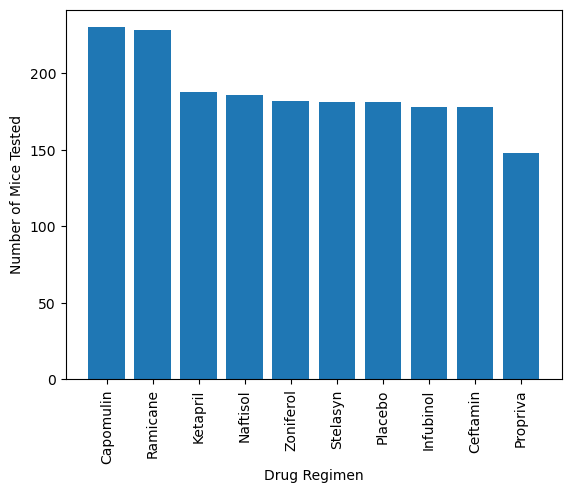

In [141]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_tx_regimen = mouse_clean_df["Drug Regimen"].value_counts().to_dict()

plt.bar(drug_tx_regimen.keys(), drug_tx_regimen.values(), align = 'center')
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


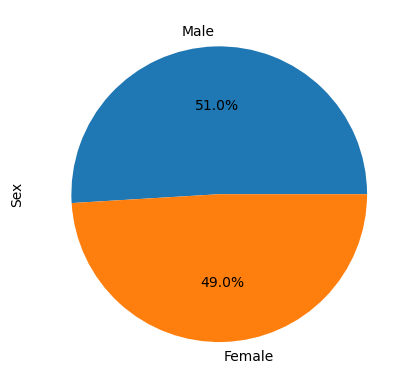

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_mouse_sex = mouse_clean_df["Sex"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
pandas_mouse_sex.set_ylabel("Sex")
plt.show()


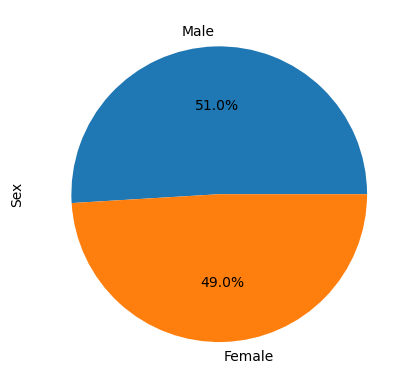

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_totals = mouse_clean_df["Sex"].value_counts().to_dict()

plt.pie(gender_totals.values(), labels = gender_totals.keys(), autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

### Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Get the last (greatest) timepoint for each mouse
# Merge this group df with the orginal Dataframe to get the tumor volume at the last timepoint

mouse_data_cleaner = mouse_clean_df[mouse_clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])==True]
timepoint_last = mouse_data_cleaner.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_last = timepoint_last.reset_index()
mouse_data_cleaner = pd.merge(mouse_data_cleaner, timepoint_last, how = 'right', on=["Mouse ID", "Timepoint"])
mouse_data_cleaner.rename(columns={"Timepoint": "Timepoint Final"})
mouse_data_cleaner.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [145]:
# Put the treatments inot a list for "for loop" (and plotting)
drug_tx = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [154]:
# Calcuate the IQR and quantitatively determine if there are any potential outliers
for drug in drug_tx:
    tumor_vol = mouse_data_cleaner[(mouse_data_cleaner["Drug Regimen"]==drug)]["Tumor Volume (mm3)"]
    quartile = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    drug_tx.append(tumor_vol)

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_vol.loc[(tumor_vol>upper_bound) | (tumor_vol<lower_bound)]
print(f'{drug} : {outlier}')

ValueError: Can only compare identically-labeled Series objects